## Assignment #2

This assignment has three parts. 

In the first part, you will implement Principle Components Analysis (from scratch) and use it to reduce the dimensionality of a dataset from 500 different measures, down to two.

In the second part, you will implement K-Means (from scratch) and use it to perform clustering on the dataset dividing the data into a series of clusters.


In the second part you will implement a mulitclass classification system to classify the data in the provided dataset into seven classes. 

### Mark-scheme
- Part 1 = 15 marks
- Part 2 = 35 marks
- Part 3 = 50 marks

-------------------------------------------------------------------------------------------------------------

## Part 1: Principle Components Analysis (PCA)
Here you will use the data provided in the "Dataset1.csv" file. 

Before clustering the data, you will implement PCA to reduce the dimensionality from 500 to 2. This way, we can see the results of the clustering on an easy to understand 2-dimensional graph.

#### 1.1 Load the Data
Populate the function below to load the data from the requested file.

In [12]:
# clear all variables
%reset_selective -f a
#import 
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import time

In [13]:
# Load "Dataset1.csv" file
# Returns X where X is a 1000 by 500 (m=1000 and d=500. d is the number of features) 
def load_data(file_name):
    X = np.genfromtxt(file_name, delimiter=',')
    return X

Loading the dataset as per your function.

In [18]:
# ## DO NOT MODIFY ##
# Instruction to load the dataset
X = load_data("Dataset1.csv")
X

array([[  -8.07685105,  -33.58631331,  -15.27939065, ...,  -53.03864118,
         -52.27372462, -103.28334587],
       [   8.18304902,   29.53624089,   17.63493745, ...,   29.97305368,
         -17.66333809,  -30.66340756],
       [  73.24842558,   38.15551394,  -29.0677124 , ...,   22.28533633,
          11.00535524,   58.80431619],
       ...,
       [ 214.82153706,  167.47857262,  131.70816936, ...,   28.19523095,
         144.67934701,   58.34002358],
       [ 138.70589099,   87.86103572,   78.57609776, ...,  105.01206432,
         121.42299713,   60.42103821],
       [  98.96731216,  139.04293498,  135.10297224, ...,  100.80531263,
         105.32461786,  138.49508788]])

#### 1.2 Preprocess the data (5 marks)
Answer the following question:

**1.a)** Question: What pre-processing method will you use and why?

<font color='yellow'>Write your answer here:</font> Subtracting the mean of each variable from the dataset so that the dataset should be centered on the origin.

Populate the function below to perform any pre-processing needed to perform PCA (successfully).

In [20]:
def pre_process(X):
    X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
    return X

#### 1.3 PCA Implementation (10 marks)
Implement PCA to reduce the dimensionality of the input matrix X from its original dimensions to 2.
- 10 marks for a correct manual implementation (you may use numpy functions - except PCA of course)
- 5 marks for a library call

In [21]:
# Perform Principle components analysis on X, returning a 2-dimension output
# input:  
# - X:    High dimensional dataset
# output: 
# - X_2d: Two dimensional dataset

def my_PCA(X):
    
    #Calculating the covariance matrix of the mean distance
    covariance = np.cov(X , rowvar = False)

    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_val , eigen_vector = np.linalg.eigh(covariance)

    #Sorting the eigenvalues and eigenvectors in descending order
    index = np.argsort(eigen_val)[::-1]
    eigenvalue = eigen_val[index]
    eigenvectors = eigen_vector[:,index]

    #Selecting the first 2 eigenvectors as 2 is desired dimension of our final reduced data.
    eigenvector_subset = eigenvectors[:,0:2]

    #Transforming and transposing the data
    X_2d = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose() 
    
    return X_2d    

(1000, 2)


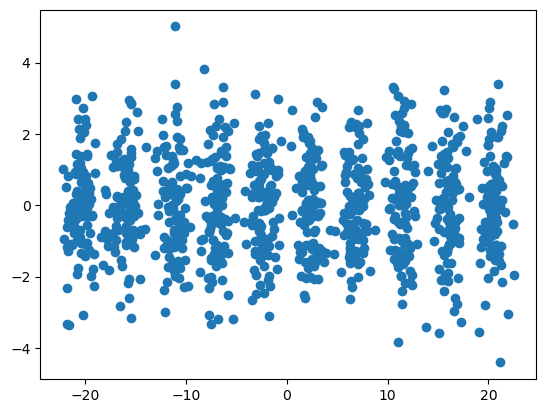

In [22]:
# ## DO NOT MODIFY ##
# Calling all of the created functions and plotting a 2D graph of the new 'data points'
X = pre_process(X)
X_2d = my_PCA(X)
# check out the shape and scatter plot the points
print(X_2d.shape)
plt.scatter(X_2d[:,0], X_2d[:,1])

In [23]:
# From PCA library from sklearn
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)
print(x)
pca = PCA(n_components=2)
principalComponent=pca.fit_transform(x)
principalDf=pd.DataFrame(data = principalComponent, columns = ['principal_component-1', 'principal_component-2'])
principalDf

[[-1.32636438 -1.80330253 -1.42918401 ... -2.18158637 -2.18420991
  -3.31491151]
 [-0.99670229 -0.50965843 -0.7624371  ... -0.51651914 -1.48740896
  -1.79862065]
 [ 0.32246868 -0.33301361 -1.70849462 ... -0.6707211  -0.9102304
   0.06944886]
 ...
 [ 3.19279924  2.31735461  1.54834911 ... -0.55217911  1.78098962
   0.05975451]
 [ 1.64958908  0.6856596   0.47205052 ...  0.9886302   1.31277622
   0.10320571]
 [ 0.84390743  1.73458993  1.61711777 ...  0.90425023  0.98867218
   1.73337742]]


,principal_component-1,principal_component-2
0,-19.956229,-1.421284
1,-20.778685,-1.472330
2,-21.827373,3.212124
3,-22.112607,-0.282710
4,-20.527961,-1.125256
...,...,...
995,21.132140,2.451725
996,19.621394,1.978816
997,20.110870,0.328843
998,20.167091,-1.910298


## Part 2: K-means

#### 2.1 Initialisation (5 marks)
Implement a function which randomly initialises centroids. Please note, the data is one of the input variables for a reason.

In [24]:
# input:
# - k: number of centers
# - X: the data
# output:
# - centroids is a k by 2 
def initialise_centroids(X,k):
    idX = np.arange(0,len(X),len(X)//k)
    centroids = X[idX, :]
    return centroids

Code to call and display ten randomly created centroids. If you get ten rainbow dots, you are on the right track.

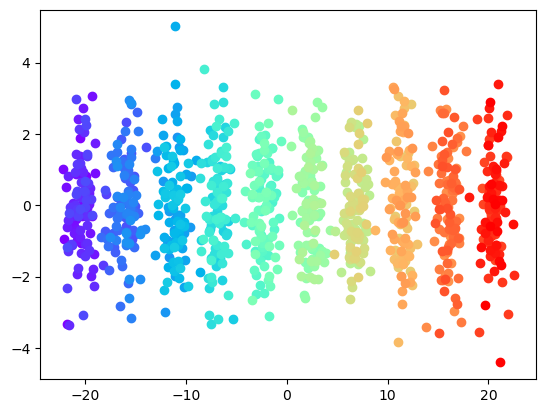

In [26]:
# ## DO NOT MODIFY ##
centroids = initialise_centroids(X_2d, 1000)

# the code below will plot the centroids
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for c in centroids:
    plt.scatter(c[0], c[1], color=next(colors))

#### 2.2 Assigning Points to Centroids (5 marks)
Implement a function that takes the matrix X and a set of centroids and assigns each point in X to one of the provided centroids.

In [27]:
from scipy.spatial.distance import cdist
# input:
# - X is a m by 2 point 
# - centroids is a k by 2 , the center of k clusters.
# output:
# - cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
def assign(X,centroids):
    distance= cdist(X, centroids ,'euclidean') 
    cluster_assignments=np.array([np.argmin(i) for i in distance])
    return cluster_assignments

Code to assign each of the points from the post-PCA data a relevant centroid.

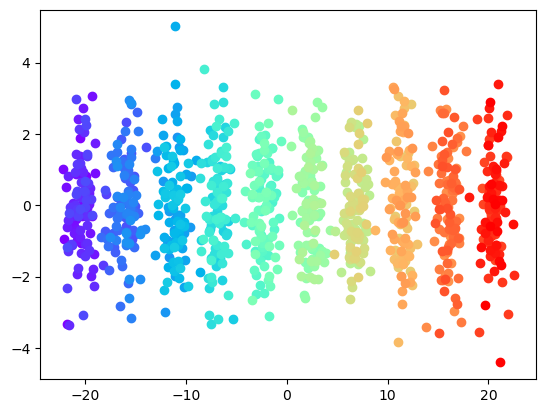

In [28]:
# ## DO NOT MODIFY ##
cluster_assignments = assign(X_2d, centroids)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))

#### 2.3 K-Means Cost Function (5 marks)
Implement a function to compute the value of a cost function given a set of centroids and assignments 

In [29]:
# input:
# - X is a m by 2 point 
# - centroids is a k by 2 , the center of k clusters.
# - cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
# output:
# - cost is the overall 'cost' of the current assignments

def cost(X, cluster_assignments, centroids):
    distance = cdist(X, centroids ,'euclidean') 
    cost = 0.0
    N, D = X.shape
    for i in range(N):
        cost = cost + np.square(distance[i][cluster_assignments[i]])
    cost = cost/N
    return cost

Code (assuming 10 centroids) which assigns each cluster and generates the equivalent cost.

In [30]:
# ## DO NOT MODIFY
k=10
centroids = initialise_centroids(X_2d, k)
cluster_assignments = assign(X_2d, centroids)
c = cost(X_2d,cluster_assignments,centroids)
print(c)

6.2167092524019685


#### 2.4 Putting it all together (20 marks)
Implement a function to perform the k-means algorithm using the functions you implemented above.

- 20 marks for a correct manual implementation (you may use numpy functions - except PCA of course)
- 5 marks for a library call

In [31]:
# input:
# - X is a m by 2 list of points 
# - k is the required number of centroids
# - num_of_iterations is the number of times the k-means algorithm will run before 'giving up'
# output:
# - cluster_assignments is a m x 1 for each point in X, which cluster it belongs to
# - centroids is a k x 2 matrix detailing the centroids of each cluster
def My_Kmeans(X,k,num_of_iterations):
    centroids = initialise_centroids(X,k)
    cluster_assignments = assign(X,centroids)
    cost_l = []
    for _ in range(num_of_iterations): 
        centroids = []
        for idx in range(k):
            temp_cent = X[cluster_assignments==idx].mean(axis=0) 
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)
        distances = cdist(X, centroids ,'euclidean')
        cluster_assignments = np.array([np.argmin(i) for i in distances])
        cost_l.append(cost(X,cluster_assignments,centroids))
    plt.plot(cost_l)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    return cluster_assignments , centroids

Code to run and test the final algorithm with 10 clusters, 1000 iterations. If you get ten blobs each of which is a different colour, you are on the right track.

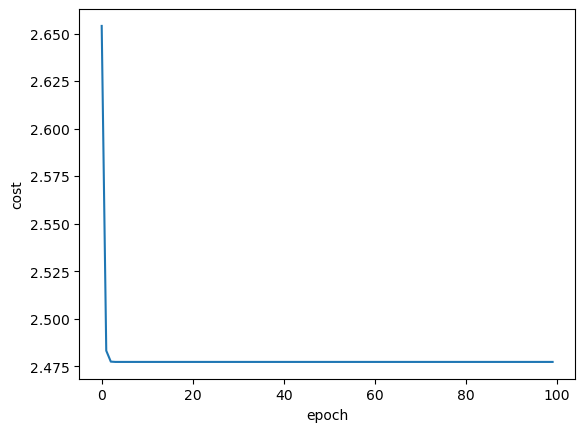

In [35]:
k = 10
centroids = []
cluster_assignments , centroids = My_Kmeans(X_2d,k,100)


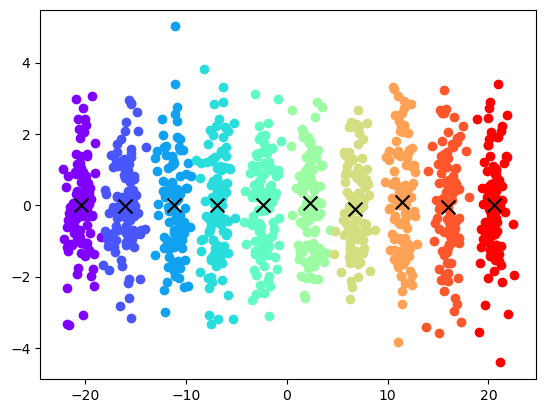

In [36]:
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

Clustering according to the data's true clusters.

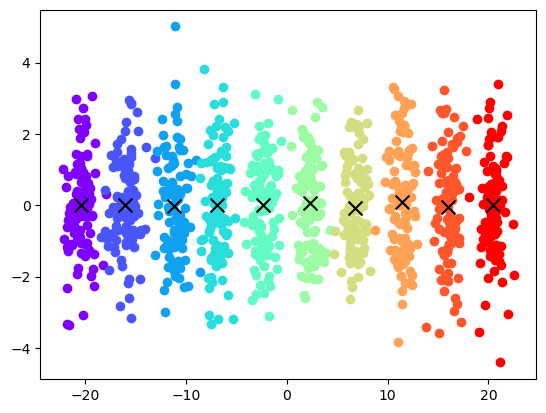

In [37]:
k = 10
cluster_assignments = load_data("True_clusters_IDs.csv")
centroids = []
for idx in range(k):            
    temp_cent = X_2d[cluster_assignments==idx].mean(axis=0)             
    centroids.append(temp_cent)
            
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in range(k):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

# Part 3 (50 Marks)

You will use the data provided in the **"Dataset2.xlxs"** file in Part 3 of the assignment. The dataset consists of 13611 samples belonging to seven different classes. Each sample has 16 features. 

* Objective: Using the provided dataset, develop a seven class classification method.

* Evaluation Criteria: Your points will be based on the final **average accuracy** achieved by your method in a **10-fold cross validation** framework.

    * 25 marks for achieving a classification accuracy above 82% and upto 87.92%         
    * 40 marks for achieving a classification accuracy above 87.92% and up to 90.0%  
    * 45 marks for achieving a classification accuracy above 90.0% and upto 93.13% 
    * 50 marks for achieving a classification accuracy above 93.13%.     

* You have the freedom to employ any pre-processing, classifiers, and 
post-processing pipeline that you find applicable. Feel free to experiment with 
a wide range of machine learning methods to improve the performance of your system. 

* Your claims and results must be reproducable. 

* To ensure the reproducibility of your results and claims, it is essential that you save both your trained models, hyperparameter specifications,  and the random seeds used throughout your experiments. Saving your models will allow reproducing the achieved accuracy, and recording the random seeds will help validate any randomness in your processes.

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import joblib  

In [38]:
# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Data Loading
df = pd.read_excel("Dataset2.xlsx")

df

,28395.000000,610.291000,208.178117,173.888747,1.197191,0.549812,28715.000000,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0.000000
0,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
1,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
2,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
3,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
4,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13605,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13606,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13607,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13608,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [39]:
# Separate features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(random_state=42))
}


# Model Evaluation
result = {}
for name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    result[name] = cv_results
    print(f"{name}: Mean Accuracy: {cv_results.mean()}, Std Dev: {cv_results.std()}")


for name, model in models.items():
    joblib.dump(model, f"{name}_model.pkl")

# Save random seed
np.random.get_state()[1].dump(open("random_seed.npy", "wb"))

Random Forest: Mean Accuracy: 0.9207401555663589, Std Dev: 0.008074873485285147
